In [1]:
ID = ['ID','householdID']
bio = ['sysbp','diabp','pulse','wbc','mcv','plt','bun','glu','crea','cho','tg','hdl','ldl','crp','hbalc','ua','htc','hgb','cysc']
chronic = ['hibpe','diabe','cancre','lunge','hearte','stroke','psyche','arthre','dyslipe','livere','kidneye','digeste','asthmae','memrye']
limit = ['dressa','batha','eata','beda','toilta','urina','moneya','medsa','shopa','mealsa','housewka','joga','walk1kma','walk100a','chaira','climsa','stoopa','lifta','dimea','armsa']
cd = ['cesd10','shlta','slfmem','imrc','dlrc','ser7','orient','draw'] #exclude tr20

import pandas as pd 
df = pd.read_csv('without_missing_age.csv')
df = df[(df.age >= 40) &(df.age <= 85)]
m5 = df[bio+chronic+limit+cd+['age']]

In [2]:
m5.shape

(19695, 62)

In [3]:
# cysc missing rate 13.1%
# dlrc missing rate 7.2%
# imrc missing rate 6.9%
m5 = m5.dropna(subset=['cysc','dlrc','imrc'])

In [4]:
m5.shape

(15834, 62)

In [5]:
m1 = {'1.Very good':'Very good','2.Good':'Good','3.Fair':'Fair','4.Poor':'Poor','5.Very Poor':'Very Poor'}
m2 = {'1.Excellent':'Excellent','2.Very Good':'Very Good','3.Good':'Good','4.Fair':'Fair','5.Poor':'Poor'}

m5['shlta'] = m5.shlta.map(m1)
m5['slfmem'] = m5.slfmem.map(m2)

In [6]:
from pycaret.regression import *
reg = setup(m5,target='age',numeric_features=['ser7','orient'],ordinal_features = { 'shlta' : ['Very Poor','Poor','Fair','Good','Very good']
                                                ,'slfmem' : ['Poor','Fair','Good','Very Good','Excellent']}
                                                ,normalize_method = 'minmax'
                                                ,normalize=True
                                                ,ignore_low_variance=True,remove_multicollinearity=True
                                                ,session_id=123)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(15834, 62)"
4,Missing Values,True
5,Numeric Features,24
6,Categorical Features,37
7,Ordinal Features,True
8,High Cardinality Features,False
9,High Cardinality Method,None


In [7]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,CatBoost Regressor,5.4226,45.6546,6.7547,0.4400,0.1098,0.0907,6.5039
1,Light Gradient Boosting Machine,5.4929,46.8293,6.8416,0.4256,0.1111,0.0919,0.4470
2,Gradient Boosting Regressor,5.5414,47.2271,6.8711,0.4208,0.1117,0.0929,4.5521
3,Bayesian Ridge,5.6286,48.8782,6.9892,0.4008,0.1138,0.0943,0.1162
4,Ridge Regression,5.6262,48.8812,6.9895,0.4007,0.1138,0.0943,0.0223
5,Linear Regression,5.6273,48.9086,6.9915,0.4004,0.1139,0.0943,0.1146
6,Huber Regressor,5.6128,49.0905,7.0045,0.3981,0.1140,0.0938,1.1472
7,Least Angle Regression,5.6503,49.4416,7.0278,0.3940,0.1144,0.0946,0.0476
8,Random Sample Consensus,5.6301,49.5688,7.0383,0.3923,0.1146,0.0940,3.5224
9,Random Forest,5.7309,50.1086,7.0774,0.3854,0.1150,0.0961,5.5618


In [8]:
cat = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,5.2951,43.7383,6.6135,0.4501,0.1085,0.0896
1,5.4813,46.9082,6.8490,0.4523,0.1119,0.0922
2,5.5422,48.2022,6.9428,0.4465,0.1114,0.0913
3,5.5566,48.1986,6.9425,0.4195,0.1126,0.0930
4,5.6539,49.5082,7.0362,0.3834,0.1142,0.0946
5,5.3852,44.6713,6.6837,0.4644,0.1078,0.0893
6,5.3986,44.6716,6.6837,0.3960,0.1097,0.0916
7,5.4323,45.2677,6.7281,0.4371,0.1092,0.0909
8,5.2905,42.7327,6.5370,0.4695,0.1059,0.0878
9,5.1904,42.6476,6.5305,0.4814,0.1068,0.0871


# Feature importance

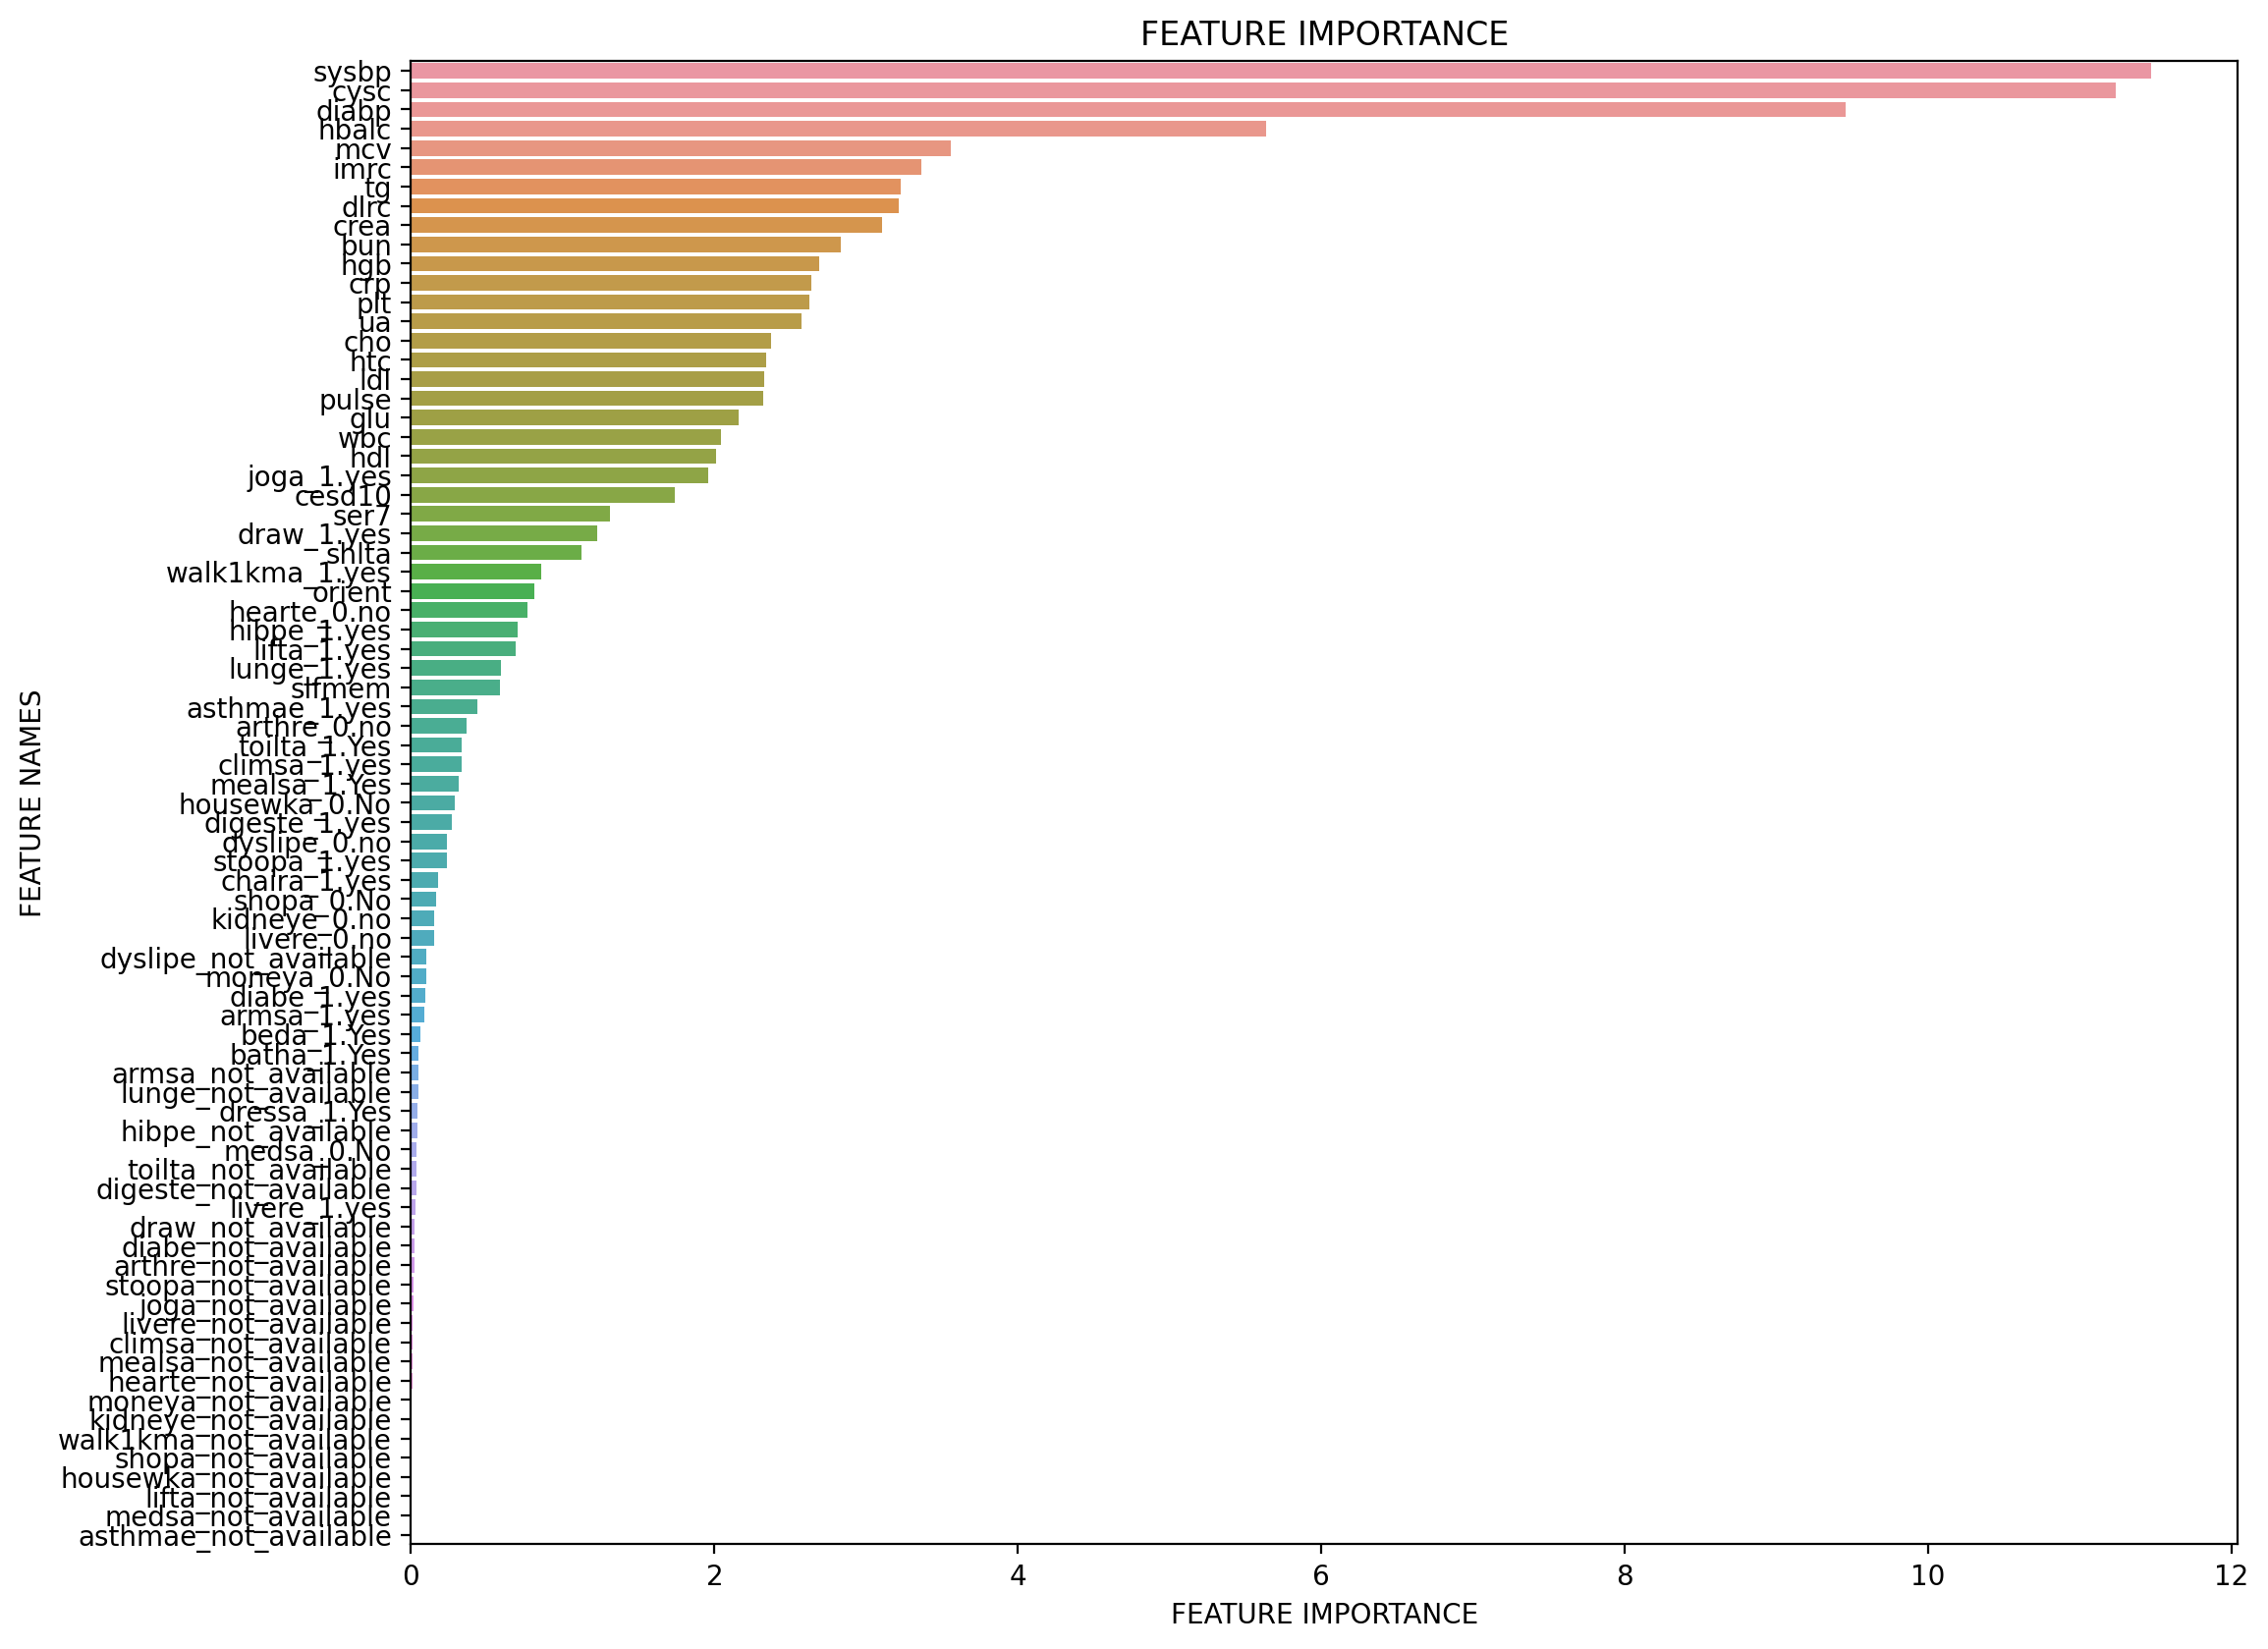

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_importance(importance,names,model_type):
    feature_importance = np.array(importance)
    feature_names = np.array(names)


    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)


    plt.figure(figsize=(12,10),dpi=200)

    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])

    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    
plot_feature_importance(cat.feature_importances_,cat.feature_names_,'')

# Prediction

In [58]:
dd = pd.read_csv('2011ForPred.csv')

pred = predict_model(best,data=dd)

pred['res']= pred['Label']-pred['age']
pred['five'] = pred.res.apply(lambda x: 1 if abs(x) <=5 else 0)
pred['ten'] = pred.res.apply(lambda x: 1 if abs(x) <=10 else 0)

pred = pred.reset_index(drop=True)
pred.to_csv('2011Pred_result.csv',index=None)

In [67]:
pred.five.value_counts()

1    4179
0    2465
Name: five, dtype: int64

In [71]:
4179/(4179+2465)

0.6289885611077664

In [68]:
pred.ten.value_counts()

1    6093
0     551
Name: ten, dtype: int64

In [73]:
6093/(6093+551)

0.9170680313064419

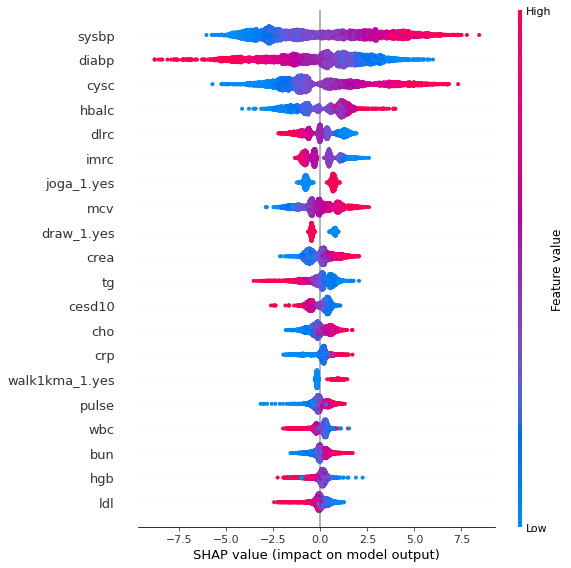

In [70]:
interpret_model(cat)

# Feature reduce re-training

In [47]:
feature = ['sysbp','diabp','cysc','hbalc','dlrc','imrc','joga','mcv','draw','crea','tg','cesd10','cho','crp','walk1kma','pulse','wbc','bun','hgb','ldl']

In [48]:
new = df[feature+['age']]

In [53]:
reg_new = setup(new,target='age',normalize_method = 'minmax',numeric_features=['dlrc','imrc']
                                ,normalize=True
                                ,ignore_low_variance=True,remove_multicollinearity=True
                                ,session_id=123)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(19695, 21)"
4,Missing Values,True
5,Numeric Features,17
6,Categorical Features,3
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [55]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,CatBoost Regressor,5.5612,48.0171,6.9274,0.4348,0.1130,0.0935,6.6240
1,Light Gradient Boosting Machine,5.5985,48.2086,6.9418,0.4326,0.1133,0.0942,0.4827
2,Gradient Boosting Regressor,5.6467,48.7298,6.9790,0.4265,0.1139,0.0951,3.8088
3,Support Vector Machine,5.7079,50.4293,7.0992,0.4063,0.1158,0.0958,10.3690
4,Random Forest,5.7898,51.1031,7.1471,0.3986,0.1166,0.0976,4.4069
5,Extra Trees Regressor,5.8550,52.2305,7.2257,0.3854,0.1179,0.0988,2.5756
6,Bayesian Ridge,5.8357,52.3166,7.2309,0.3844,0.1182,0.0982,0.0350
7,Ridge Regression,5.8357,52.3164,7.2309,0.3844,0.1182,0.0982,0.0177
8,Linear Regression,5.8346,52.3171,7.2309,0.3843,0.1182,0.0982,0.0211
9,Least Angle Regression,5.8346,52.3171,7.2309,0.3843,0.1182,0.0982,0.0267


In [56]:
catb = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,CatBoost Regressor,5.5612,48.0171,6.9274,0.4348,0.1130,0.0935,6.4025
1,Light Gradient Boosting Machine,5.5985,48.2086,6.9418,0.4326,0.1133,0.0942,0.3237
2,Gradient Boosting Regressor,5.6467,48.7298,6.9790,0.4265,0.1139,0.0951,3.0019
3,Support Vector Machine,5.7079,50.4293,7.0992,0.4063,0.1158,0.0958,8.2406
4,Random Forest,5.7898,51.1031,7.1471,0.3986,0.1166,0.0976,3.1774
5,Extra Trees Regressor,5.8550,52.2305,7.2257,0.3854,0.1179,0.0988,1.8630
6,Bayesian Ridge,5.8357,52.3166,7.2309,0.3844,0.1182,0.0982,0.0207
7,Ridge Regression,5.8357,52.3164,7.2309,0.3844,0.1182,0.0982,0.0106
8,Linear Regression,5.8346,52.3171,7.2309,0.3843,0.1182,0.0982,0.0166
9,Least Angle Regression,5.8346,52.3171,7.2309,0.3843,0.1182,0.0982,0.0180
